In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.array([[51, 55], [14, 19], [0, 4]])
X = X.flatten() # 将X转换为一维数组
X[np.array([0, 2, 4])] # 获取索引为0、2、4的元素
X > 15
X[X>15]

array([51, 55, 19])

对NumPy数组使用不等号运算符等（上例中是 X > 15 ）,结果会得到一个
布尔型的数组。上例中就是使用这个布尔型数组取出了数组的各个元素（取
出 True 对应的元素）。

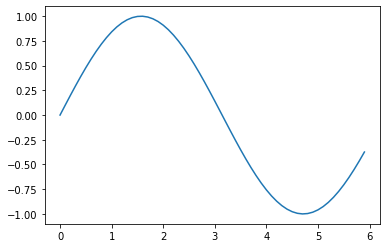

In [7]:
# 生成数据
x = np.arange(0, 6, 0.1) # 以0.1为单位，生成0到6的数据
y = np.sin(x)
plt.plot(x, y)
plt.show()

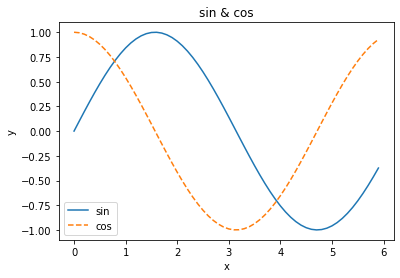

In [11]:
# 生成数据
x = np.arange(0, 6, 0.1) # 以0.1为单位，生成0到6的数据
y1 = np.sin(x)
y2 = np.cos(x)
# 绘制图形
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle = "--", label="cos") # 用虚线绘制
plt.xlabel("x") # x轴标签
plt.ylabel("y") # y轴标签
plt.title('sin & cos') # 标题
plt.legend() #用于添加图例
plt.show()

### 跃阶函数的实现

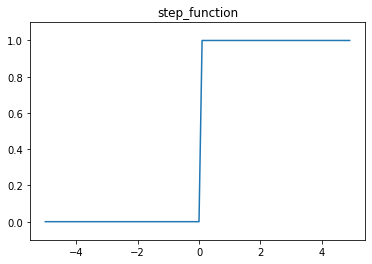

In [16]:
# 定义跃阶函数
def step_function(x):
    y = x > 0
    return y.astype(np.int)
step_function(np.array([1.0, -1.0, 2.3, -3, 1]))

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.title('step_function')
plt.show()

### sigmoid函数的实现

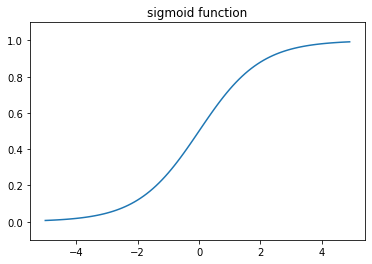

In [17]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y
x = np.arange(-5.0, 5.0 ,0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # 指定y轴的范围
plt.title('sigmoid function')
plt.show()

### ReLU函数的实现

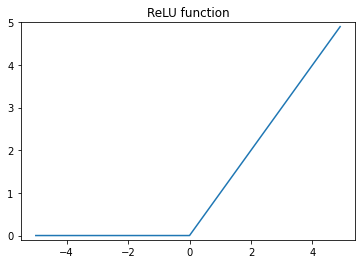

In [19]:
def ReLU(x):
    return np.maximum(0, x)
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.ylim(-0.1, 5)
plt.title('ReLU function')
plt.show()

### 多维数组
`np.dim()`获取维度
`np.shape()`获取形状

In [21]:
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(np.shape(A))
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[1 2 3 4]
1
(4,)
[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 矩阵乘法

In [22]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])
np.dot(A, B)

array([[22, 28],
       [49, 64]])

### 三层神经网络的实现
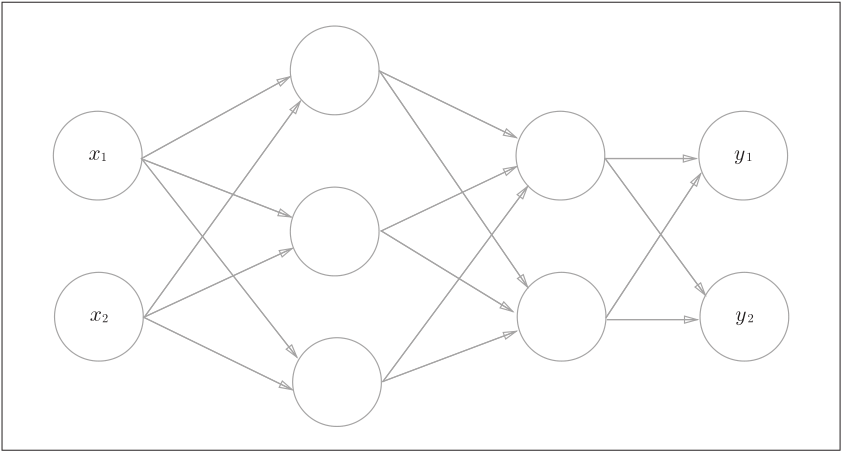

In [24]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forword(network, x): #此处x是一个行向量
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1 # 第一层
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network=init_network()
x = np.array([1.0, 0.5])
y = forword(network, x)
print(y)

[0.31682708 0.69627909]


### 输出层的设计
需要根据是分类问题还是回归问题来改变输出层的激活函数
一般来说，回归问题用恒等函数，分类问题用softmax函数

In [27]:
def softmax(x):
    c = np.max(a)
    exp_a = np.exp(x -c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

### 手写数字识别

#### 导入数据

In [2]:
import sys, os
sys.path.append(os.pardir) # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


### 定义获取MNIST数据的函数

In [6]:
import sys, os
sys.path.append(os.pardir) # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
    return x_test, t_test

#### 添加批处理
```
x, t = get_data()
network = init_network()
batch_size = 100 # 批数量
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
x_batch = x[i:i+batch_size]
y_batch = predict(network, x_batch)
p = np.argmax(y_batch, axis=1)
accuracy_cnt += np.sum(p == t[i:i+batch_size])
```

## 神经网络的学习

### 均方误差
$$
E = \frac{1}{2}\sum_{k}(y_k-t_k)^2
$$
$y_k$是神经网络输出，$t_k$表示监督数据

In [3]:
def mean_square_error(y, t):
    return 0.5 * np.sum((y, t)**2)

### 交叉熵误差
$$
E = -\sum_{k}t_k log y_k
$$

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7 # 加上delta防止某一维为0
    return - np.sum(t * np.log(y+delta))
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

### mini-batch
MNIST数据集的训练数据有60000个，如果以全部数据为对象
求损失函数的和，则计算过程需要花费较长的时间。再者，如果遇到大数据，
数据量会有几百万、几千万之多，这种情况下以全部数据为对象计算损失函
数是不现实的。因此，我们从全部数据中选出一部分，作为全部数据的“近
似”。神经网络的学习也是从训练数据中选出一批数据（称为mini-batch,小
批量），然后对每个mini-batch进行学习。比如，从60000个训练数据中随机
选择100笔，再用这100笔数据进行学习。这种学习方式称为mini-batch学习。

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [11]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

使用 `np.random.choice()` 可以从指定的数字中随机选择想要的数字。比如，
`np.random.choice(60000, 10)` 会从0到59999之间随机选择10个数字
之后，我们只需指定这些随机选出的索引，取出mini-batch，然后使用
这个mini-batch计算损失函数即可。

### mini-batch版交叉熵误差的实现

In [13]:
def batch_cross_entropy_error(y, t):
    if y.dim == 1: # 如果是单个数据点
        y = y.reshape(1, y.size)
        t = t.reshape(1, t.size)
    batch_size = y.shape[0] # 获取这批数据有多少个
    return -np.sum(t, np.log(y + 1e-7)) / batch_size

### 数值微分

In [14]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

### 梯度计算
$x$是一个向量，对每一个分量分别求取数值微分

In [13]:
def numerical_gradient(f, x): # x是一个向量
    h = 1e-4
    grad = np.zeros_like(x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) /(2*h)
        x[idx] = tmp_val
    return grad

### 梯度下降法

In [6]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x = x - lr * grad
    return x

### 用梯度法求$f(x_0+x_1)=x_0^2+x_1^2$的最小值

In [15]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])